In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append("..")

import chess
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import numpy as np


import torch
import models.move_evaluation as me_models


from playing.testing import test_agent, play_game, play_game_with_material_count, test_agent_material_count
import board_representation.sentimate as br_sentimate

In [3]:
model = me_models.SentimateNet(output_size=2, dropout=0.0, skip_connection=True, input_channels=24)
model.load_state_dict(torch.load("../../models/move_evaluation/sentimate/sentimate-2-22/skip_connection/epoch_3.pt"))

<All keys matched successfully>

In [6]:
import array
from playing.agents import ModelAgent, RandomAgent
import playing.agents as agents
from playing.testing import play_against_agent


def move_to_tensor(board, move):
    pl = br_sentimate.move_to_piece_list(board, move)
    array = br_sentimate.piece_lists_to_board_array_only_pieces(*pl)
    tensor = torch.from_numpy(array)
    return tensor


model_agent = ModelAgent(model, convert_fn=move_to_tensor)
# test_agent(model_agent, n_games=100)

In [72]:
board = chess.Board()

moves_tensors = [move_to_tensor(board, move) for move in board.legal_moves]
model_input = torch.stack(moves_tensors)
model_input.shape

torch.Size([20, 24, 8, 8])

In [4]:
good_prob_model = me_models.GoodProbability(model)

In [111]:
agent = agents.NegaMaxModelSearchAgent(good_prob_model, depth=3)

In [119]:
board = chess.Board()
board.push_san("e4")
agent.play(board)

Move.from_uci('e7e5')

In [121]:
test_agent(agent, n_games=100)

100%|██████████| 50/50 [21:03<00:00, 25.26s/it]


Counter({1: 50})


100%|██████████| 50/50 [19:07<00:00, 22.95s/it]

Counter({-1: 47, 0: 3})


{'white': Counter({1: 50}), 'black': Counter({-1: 47, 0: 3})}

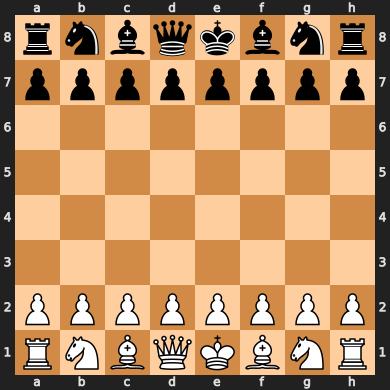

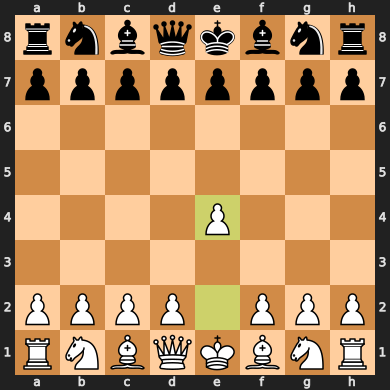

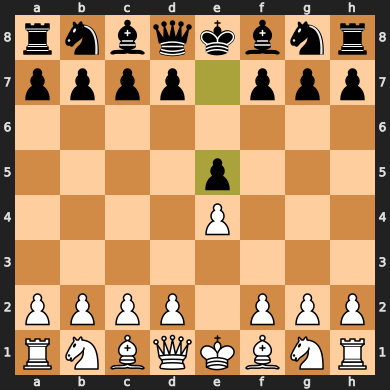

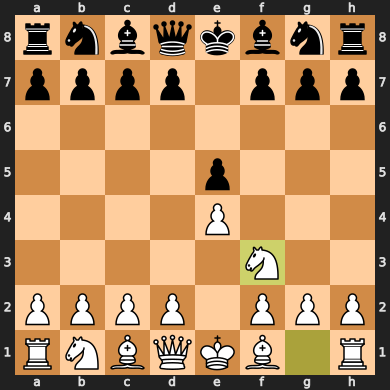

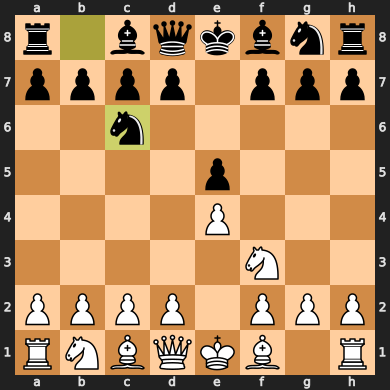

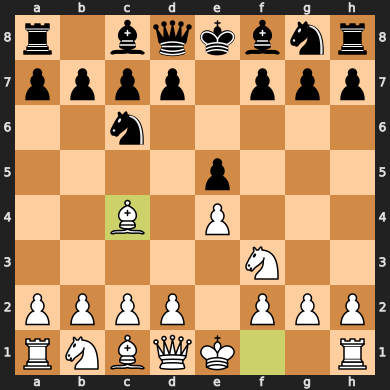

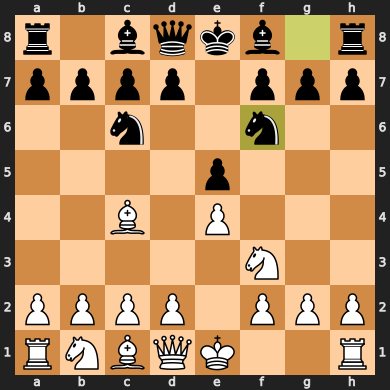

Illegal move


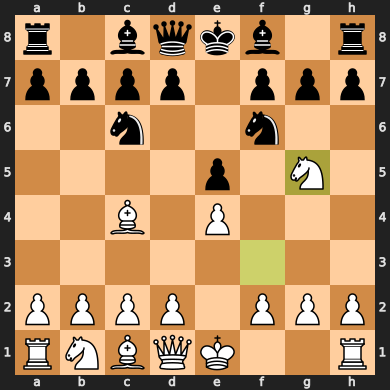

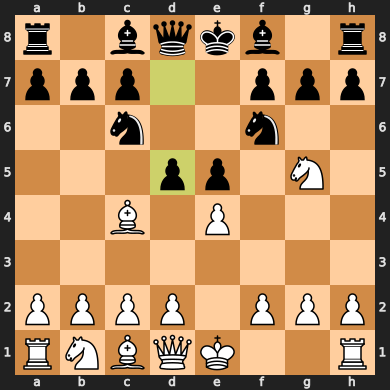

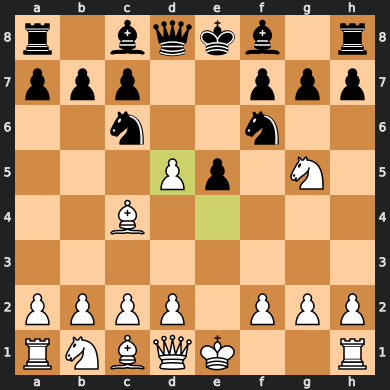

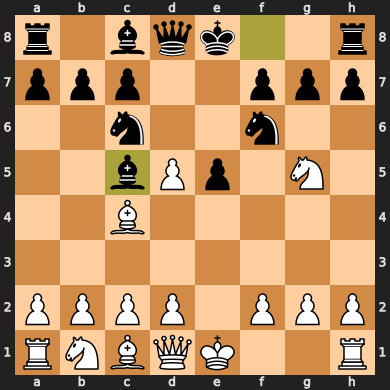

Illegal move
Illegal move


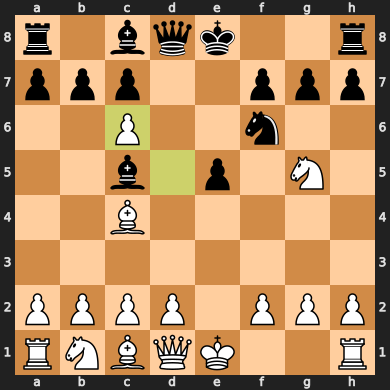

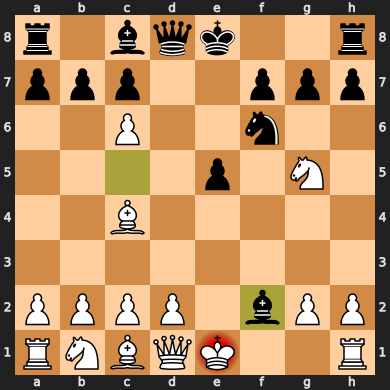

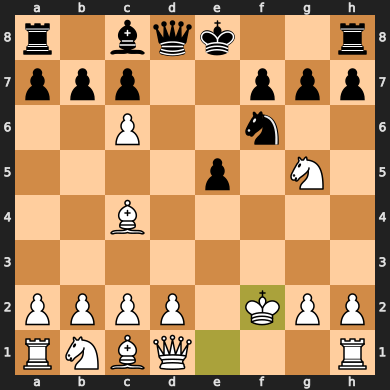

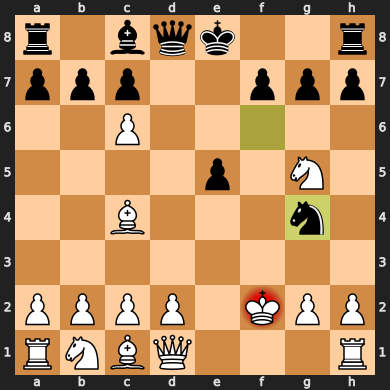

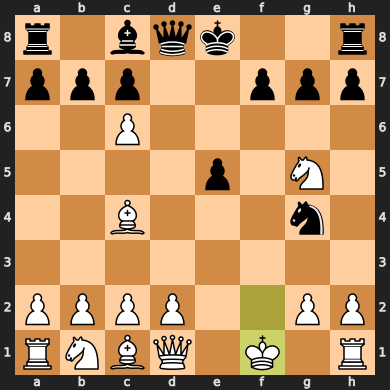

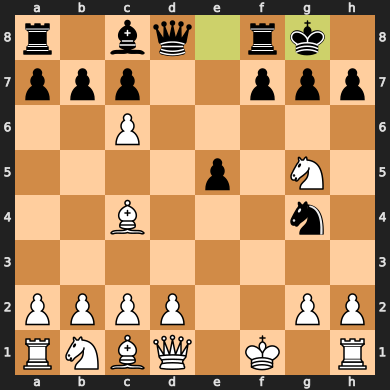

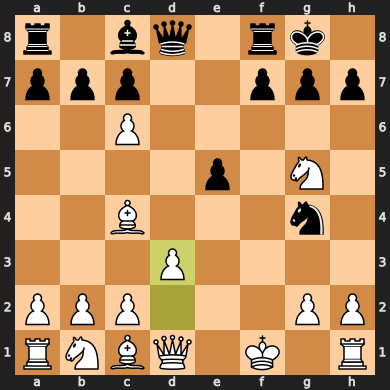

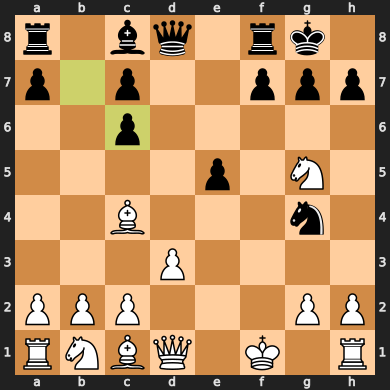

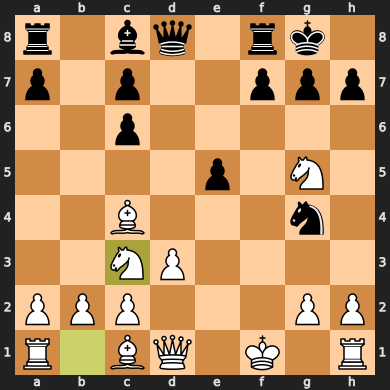

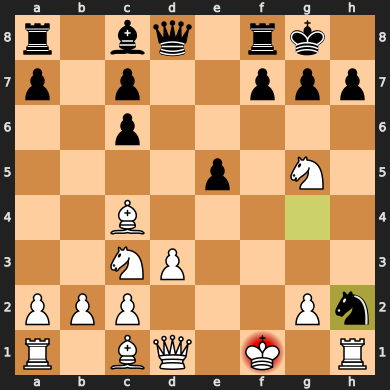

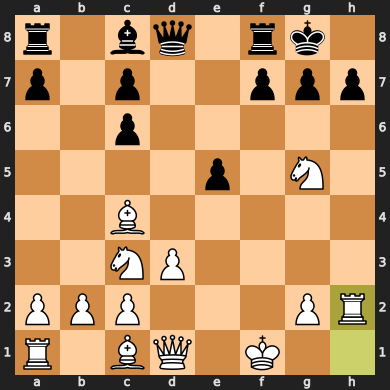

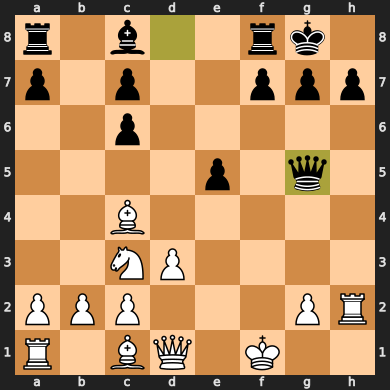

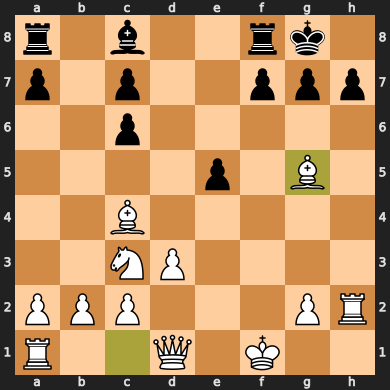

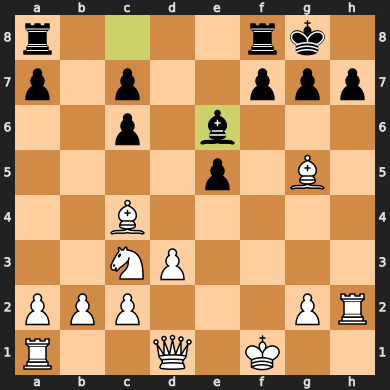

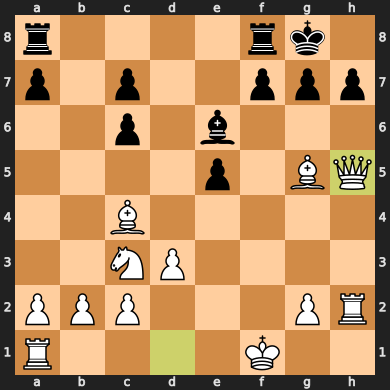

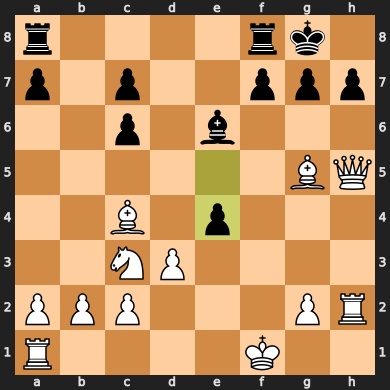

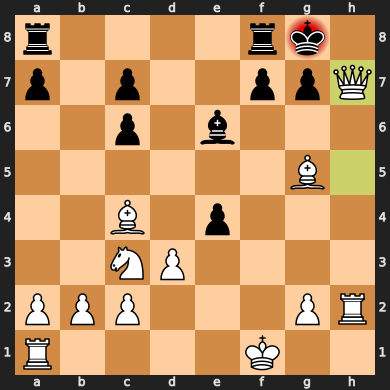

Game over
1-0


In [120]:
play_against_agent(agent)

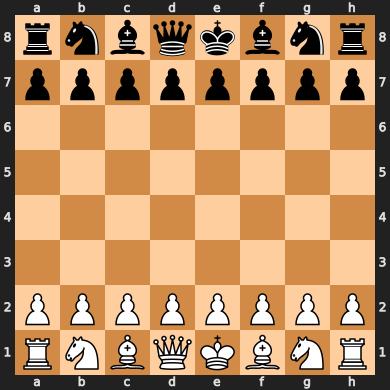

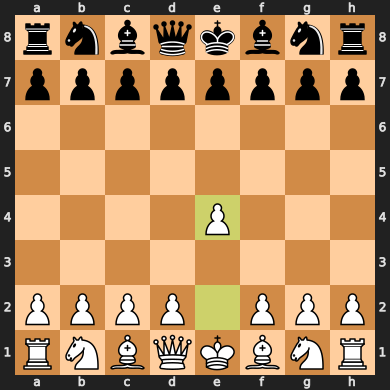

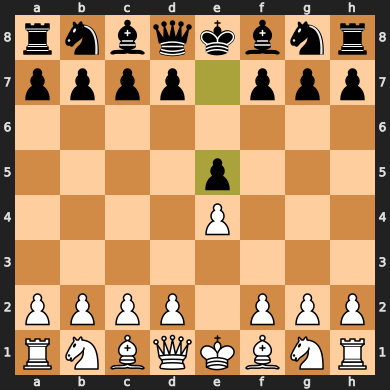

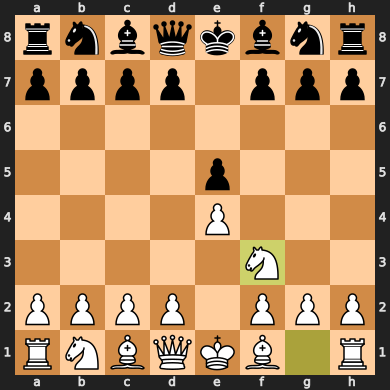

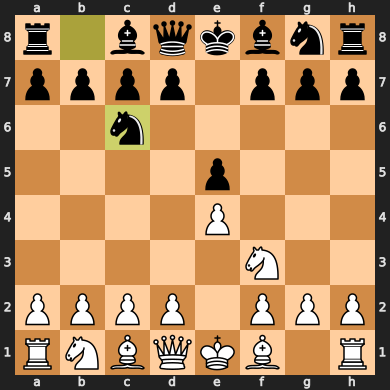

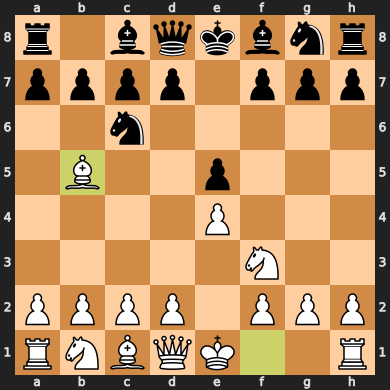

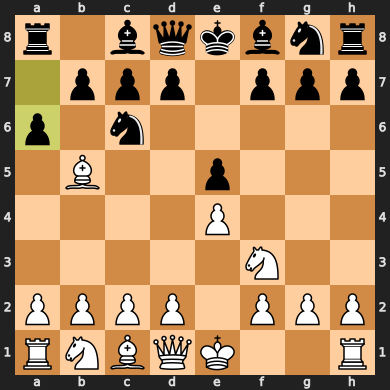

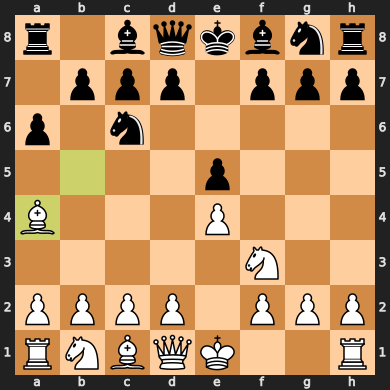

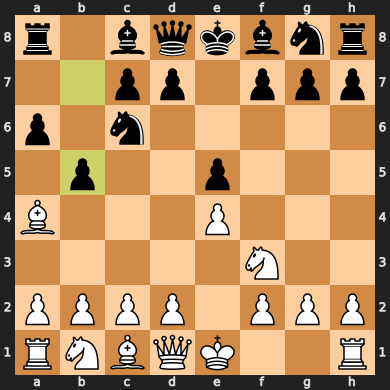

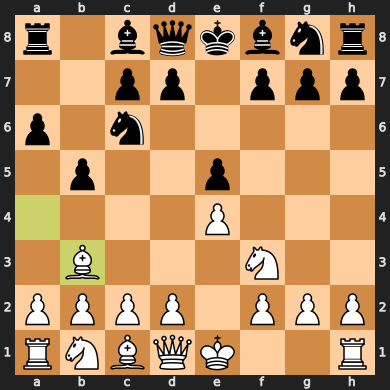

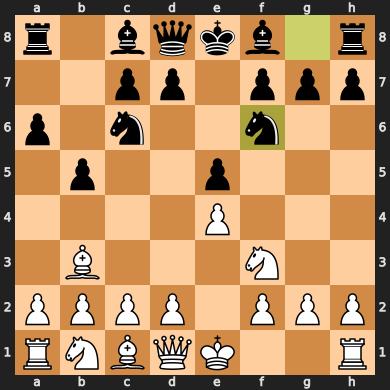

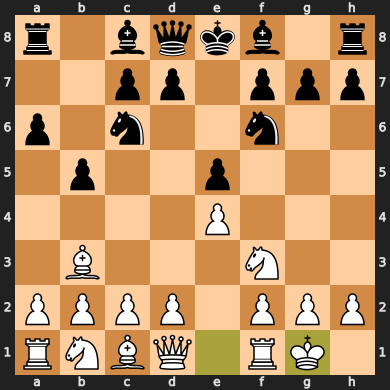

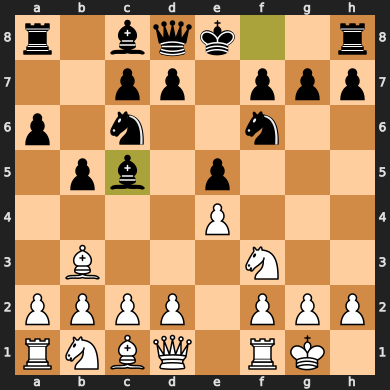

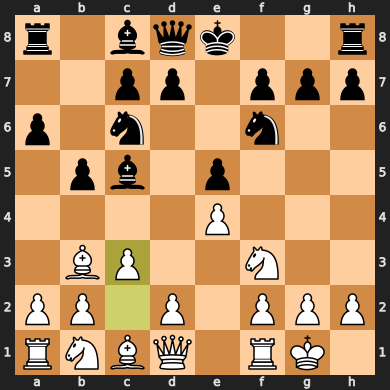

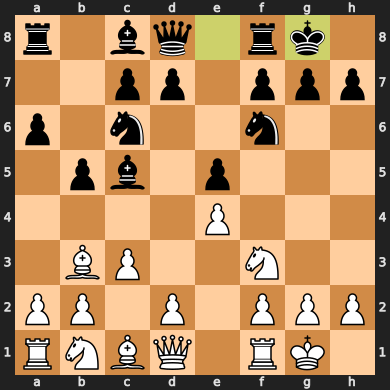

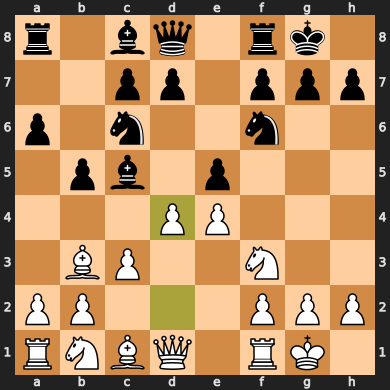

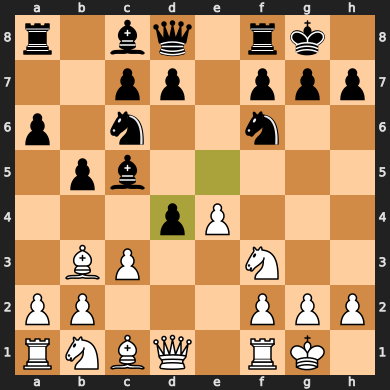

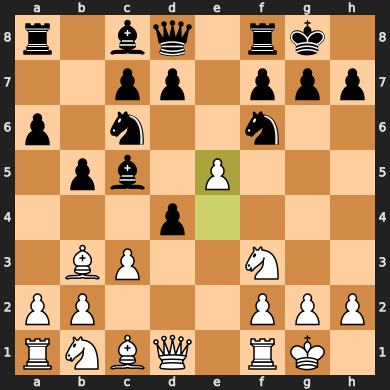

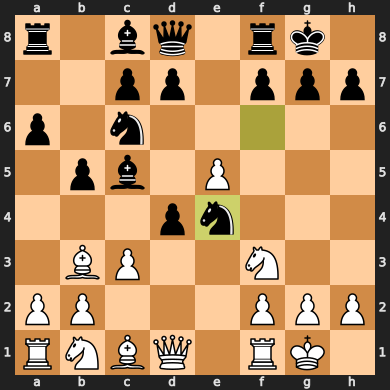

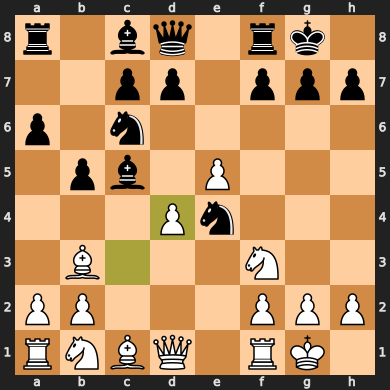

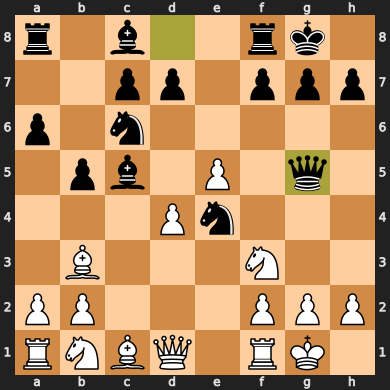

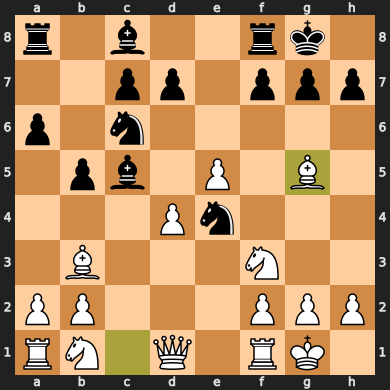

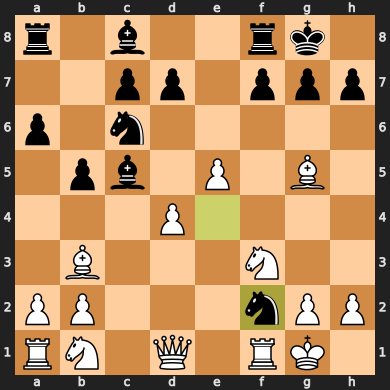

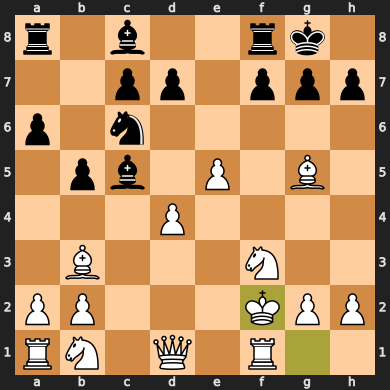

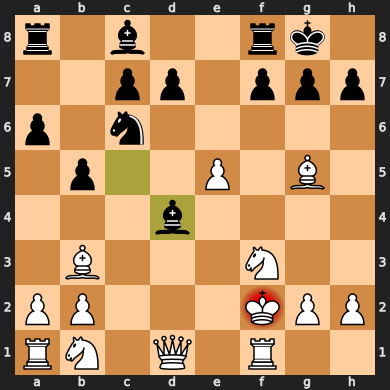

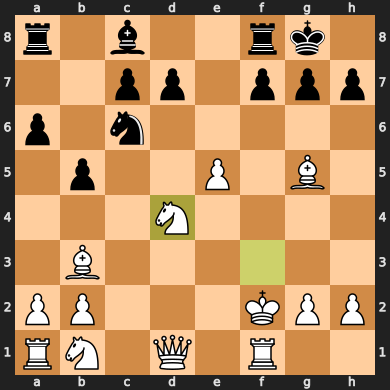

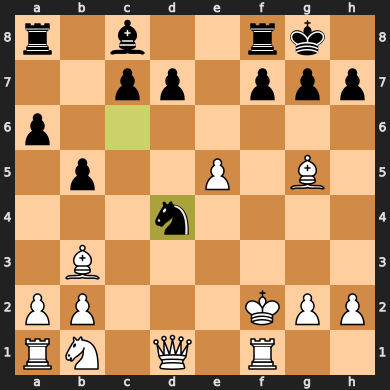

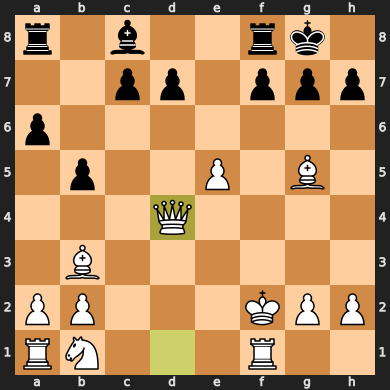

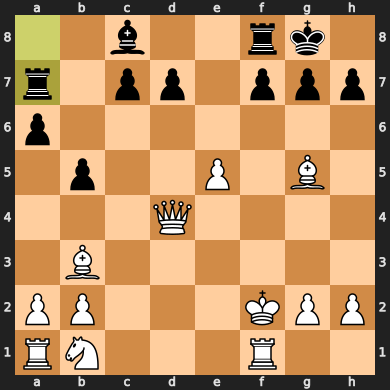

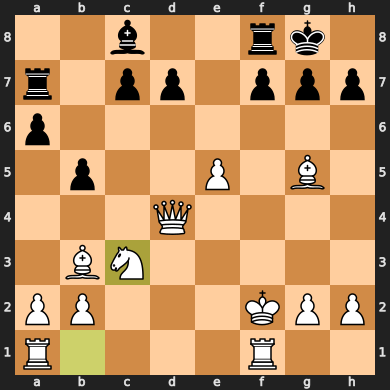

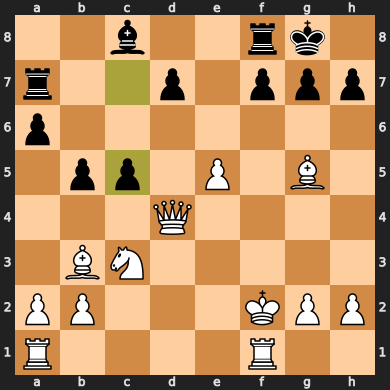

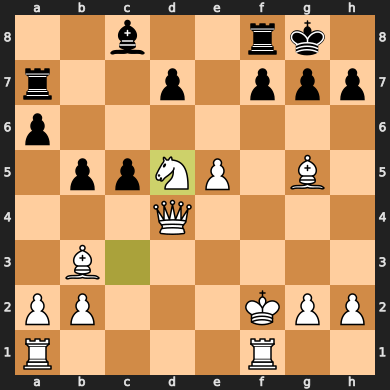

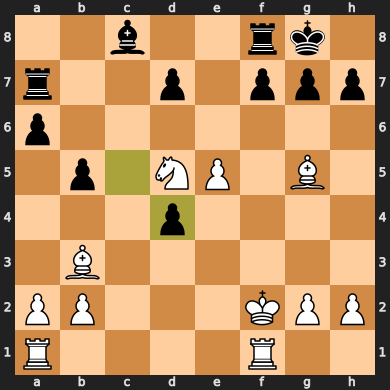

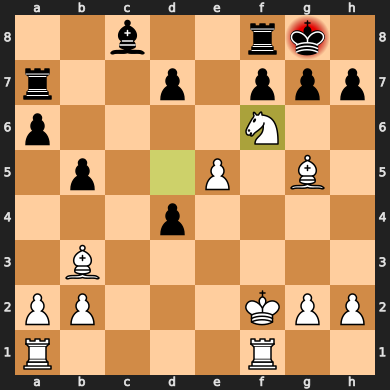

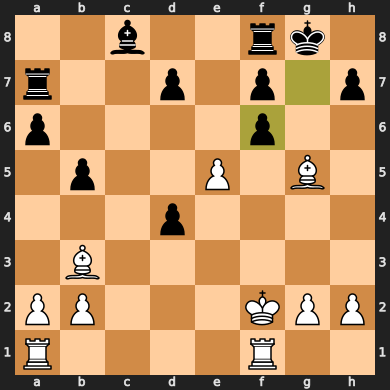

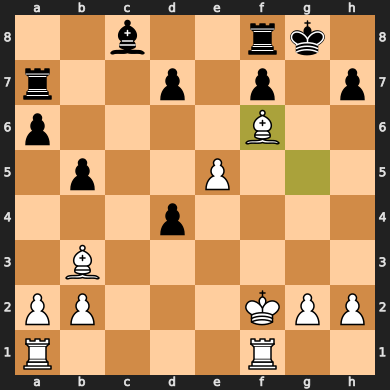

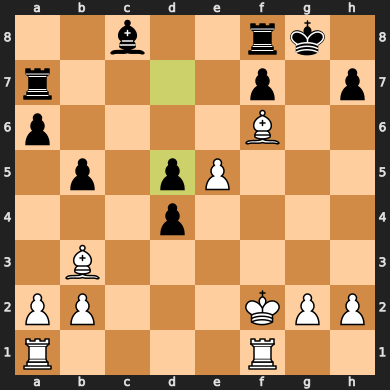

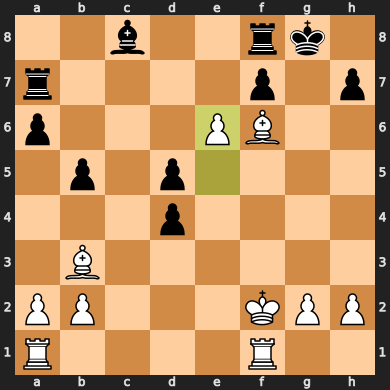

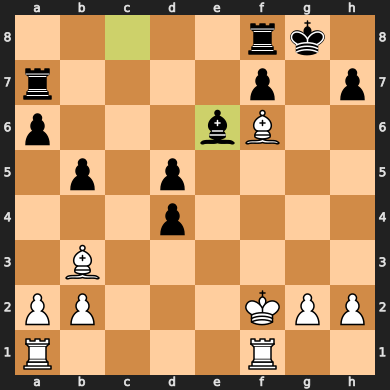

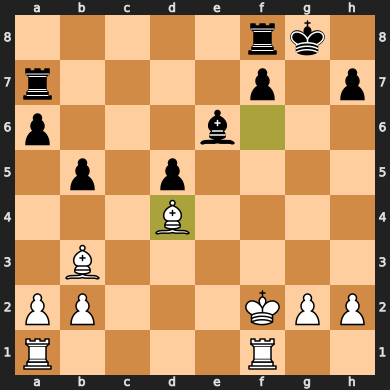

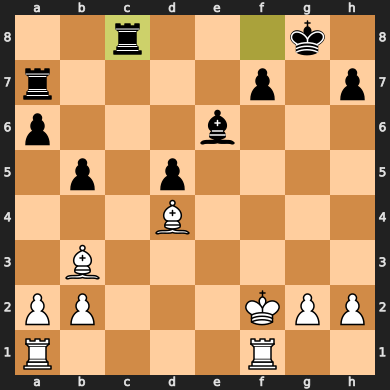

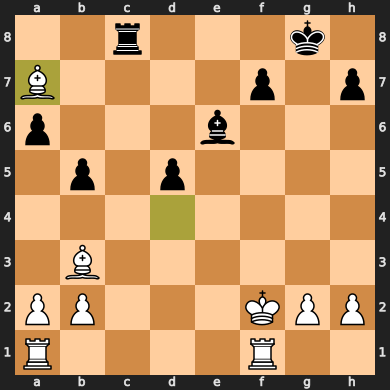

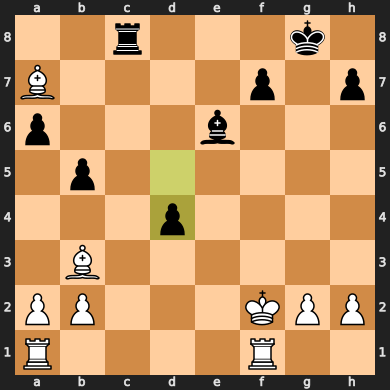

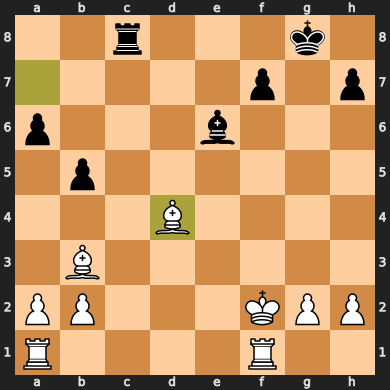

Illegal move


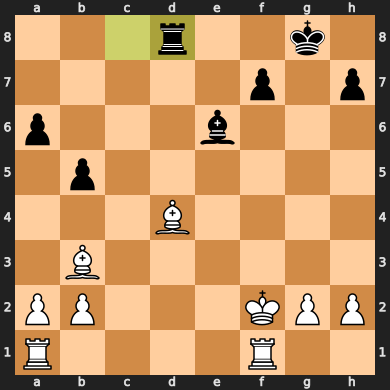

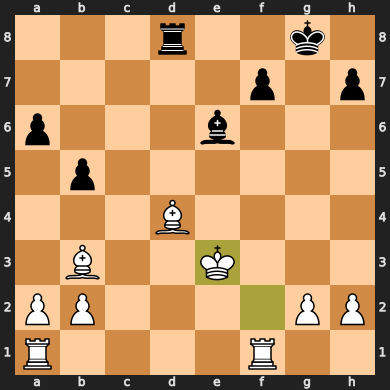

Illegal move


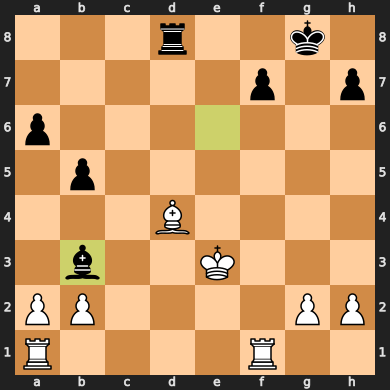

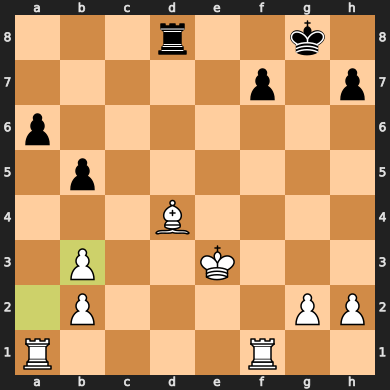

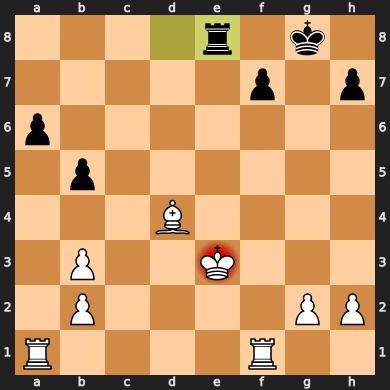

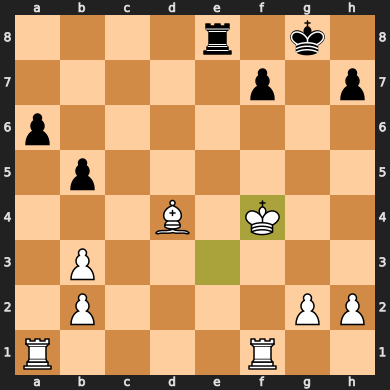

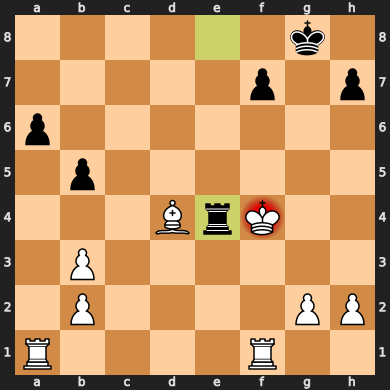

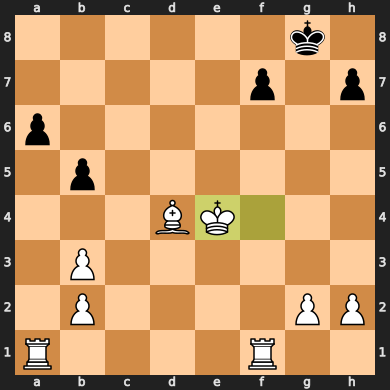

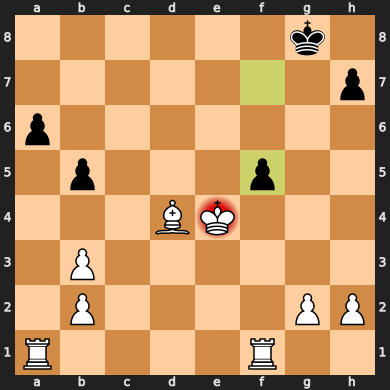

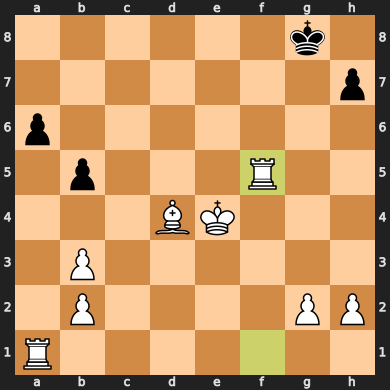

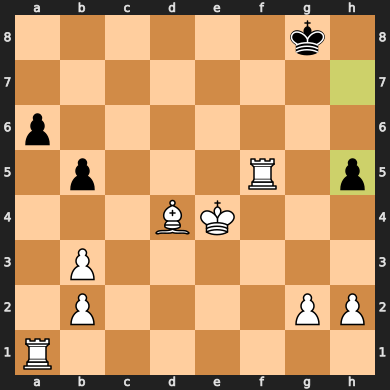

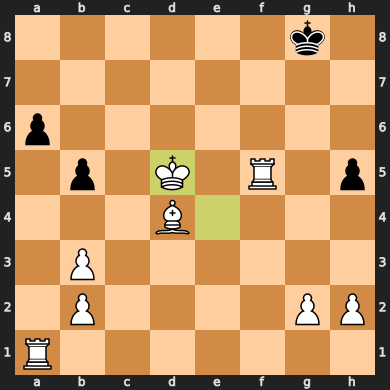

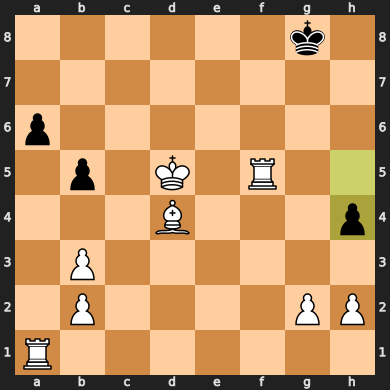

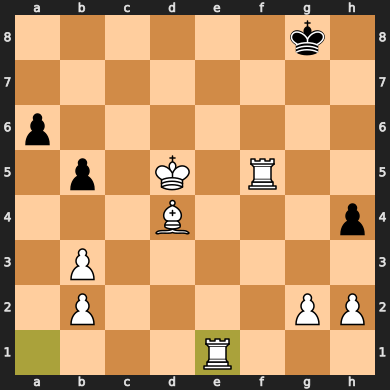

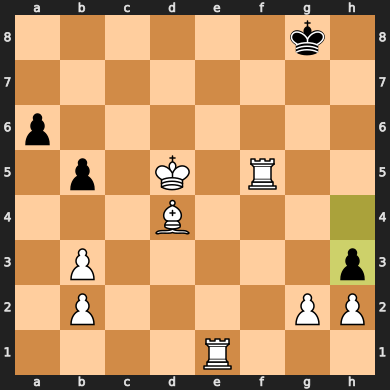

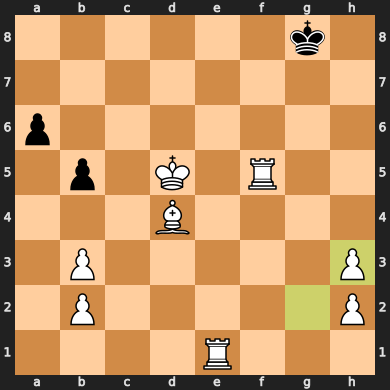

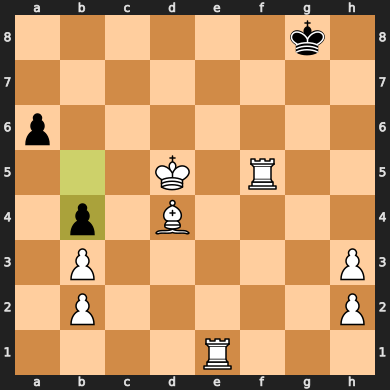

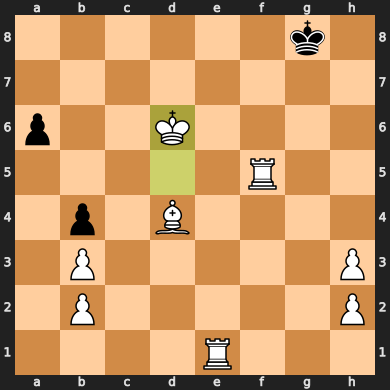

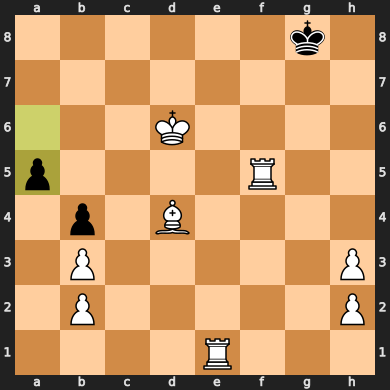

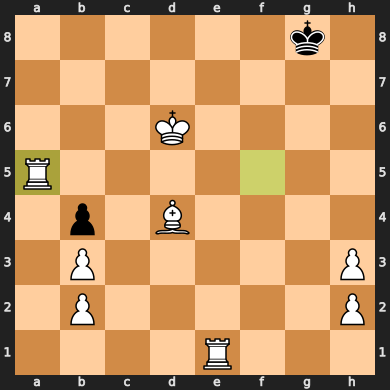

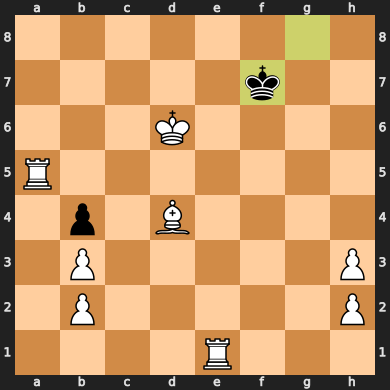

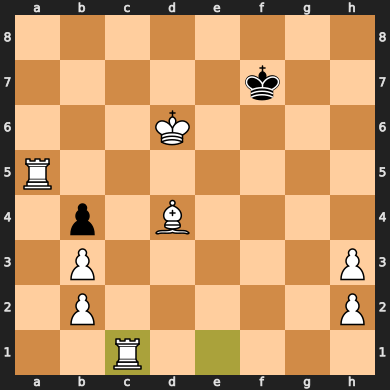

Illegal move


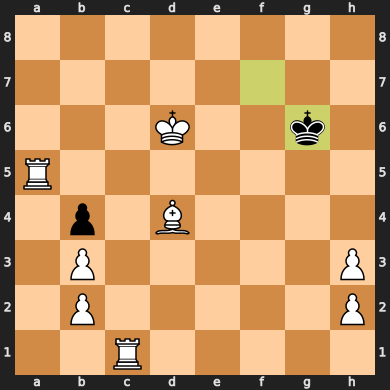

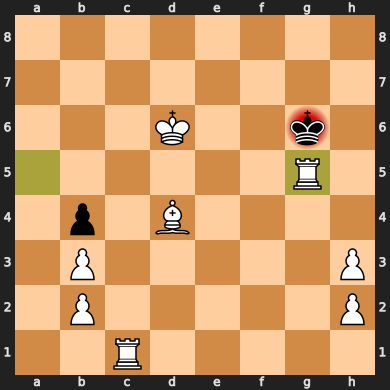

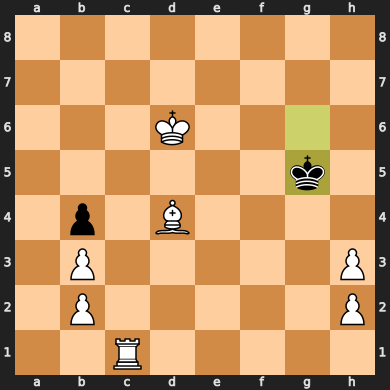

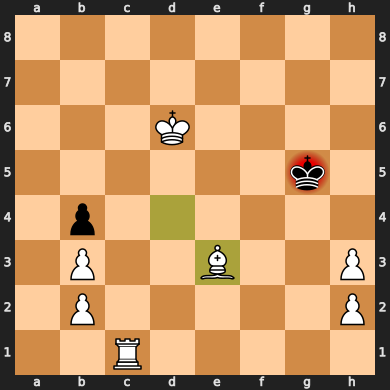

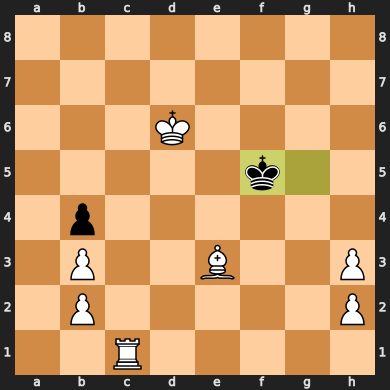

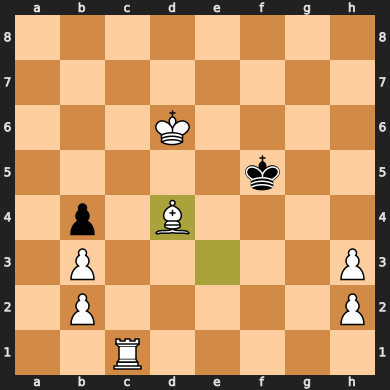

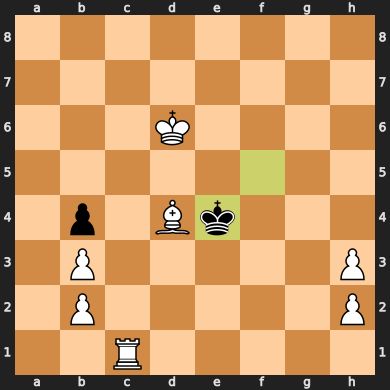

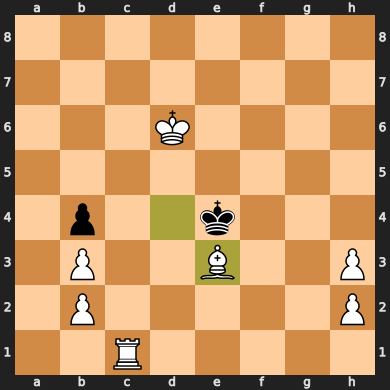

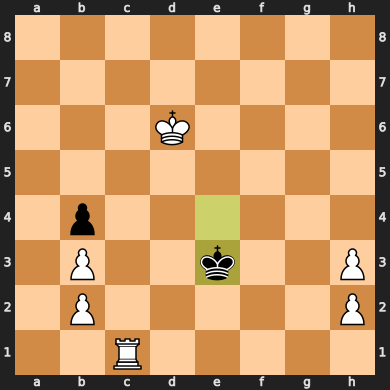

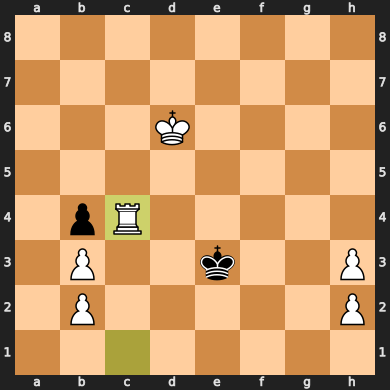

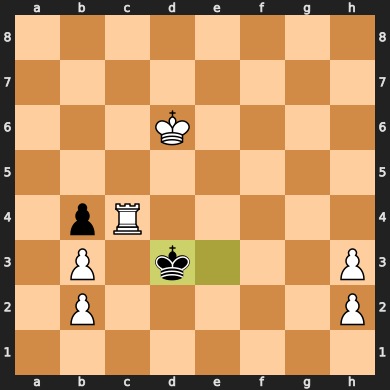

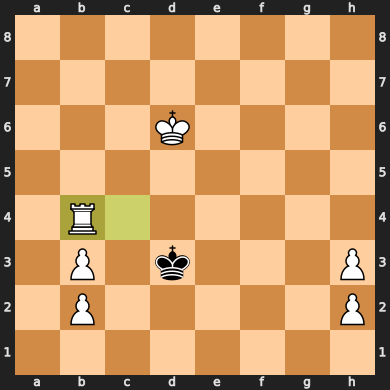

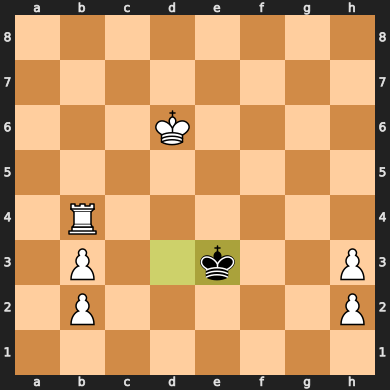

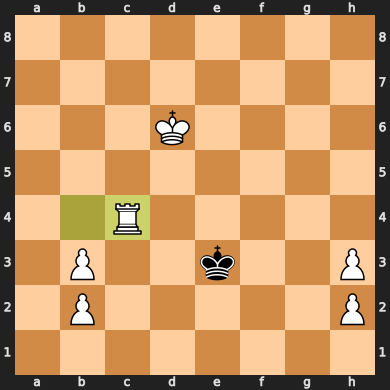

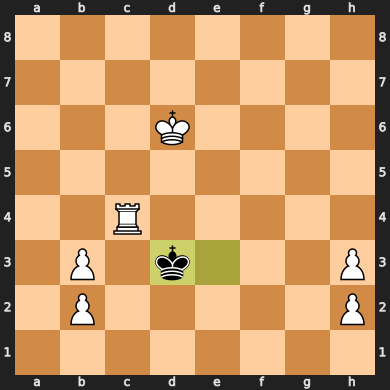

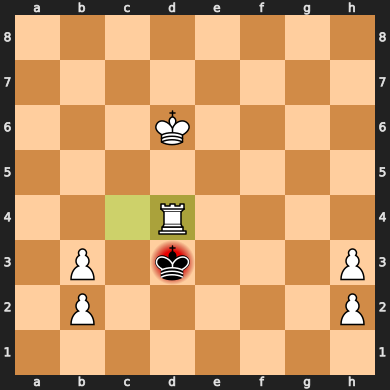

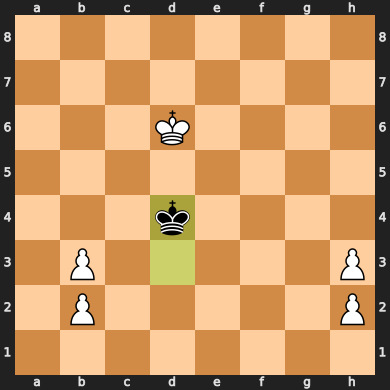

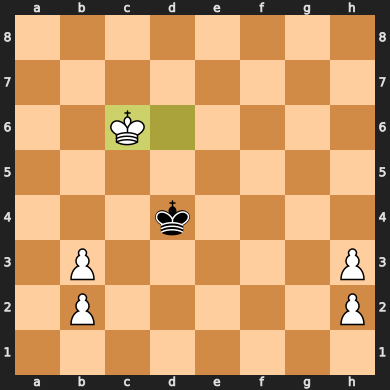

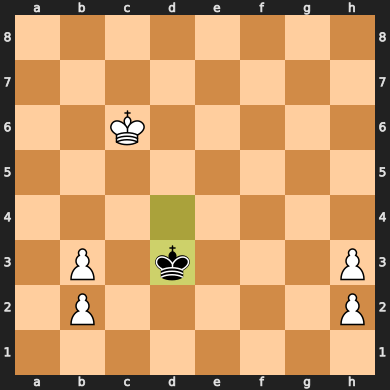

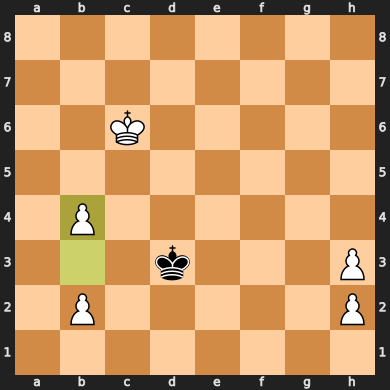

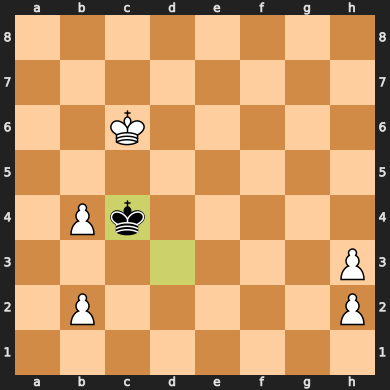

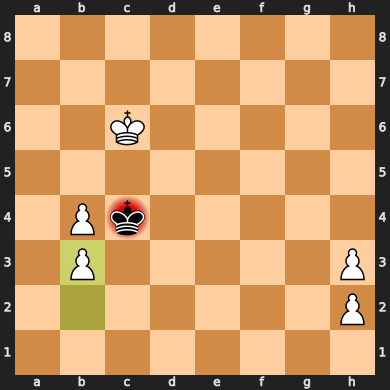

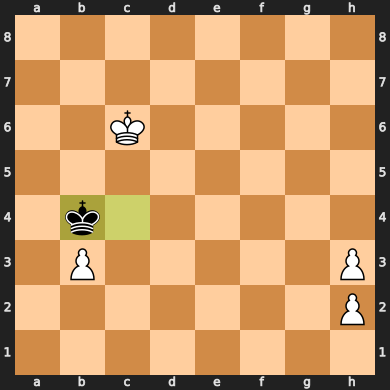

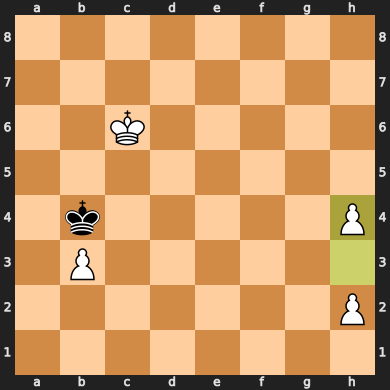

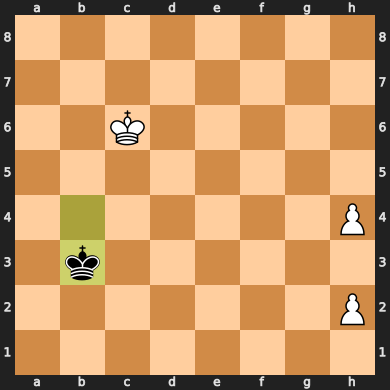

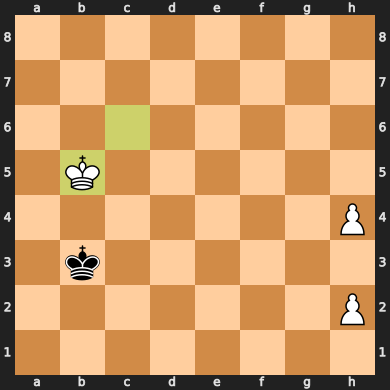

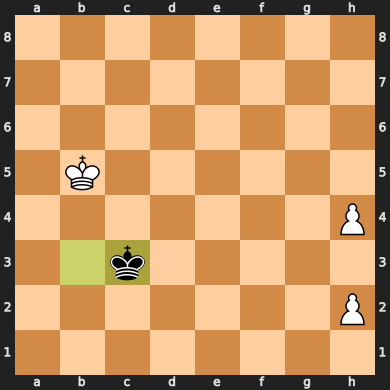

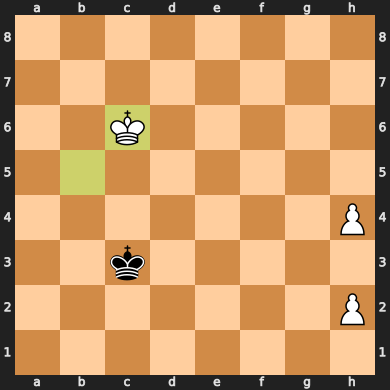

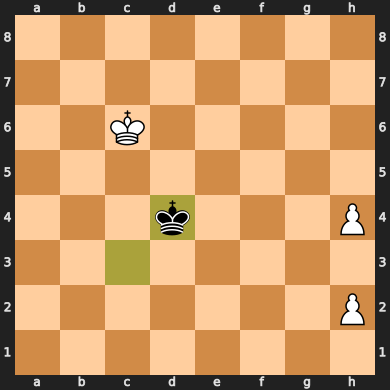

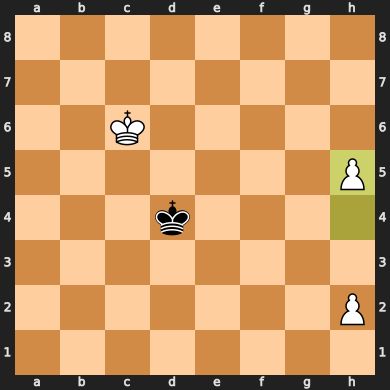

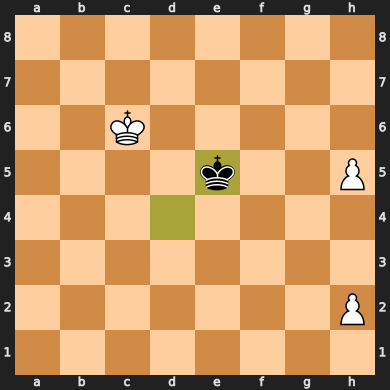

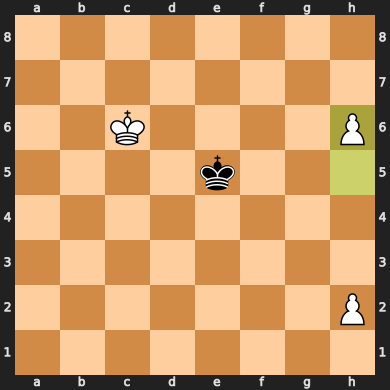

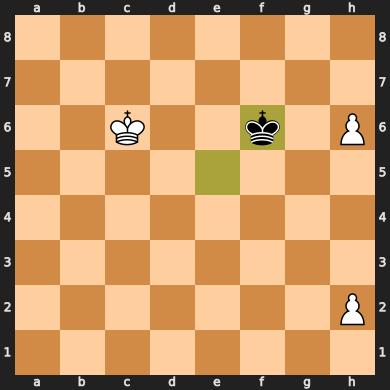

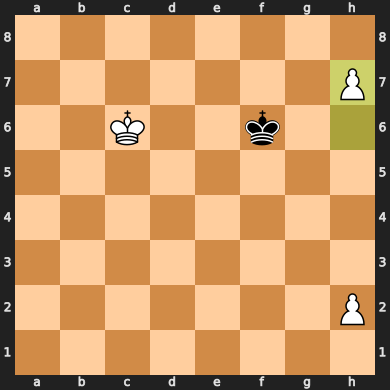

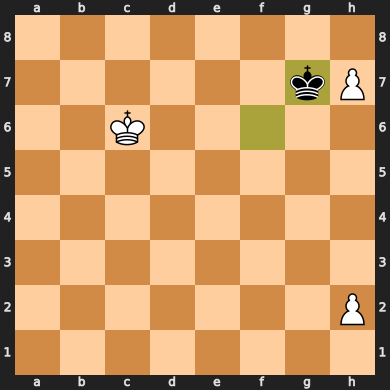

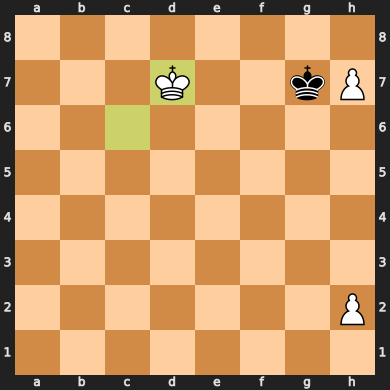

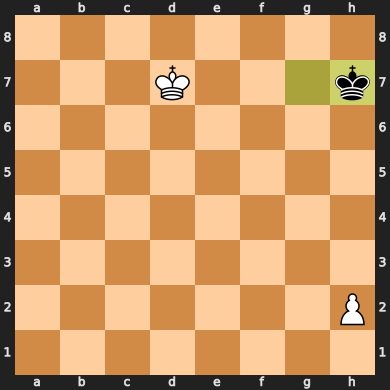

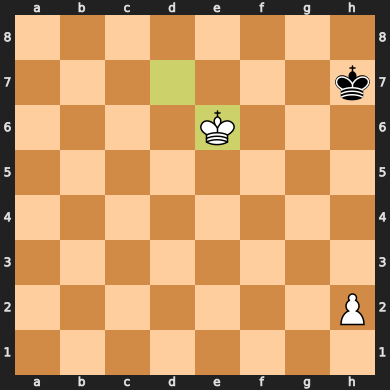

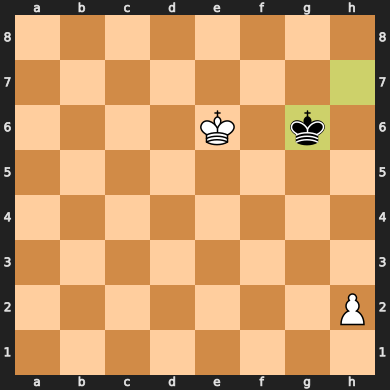

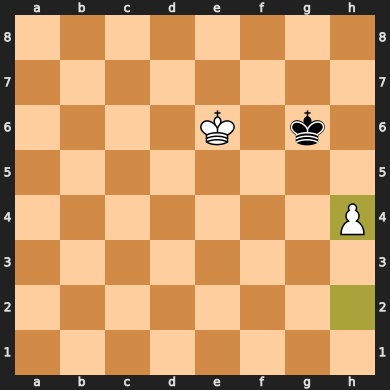

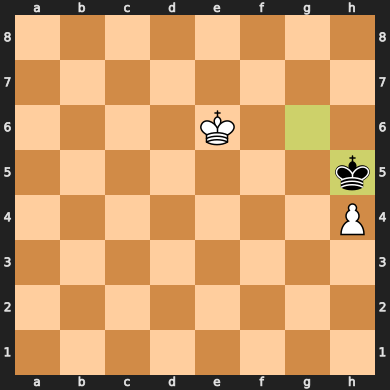

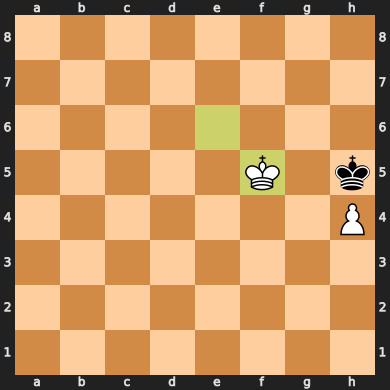

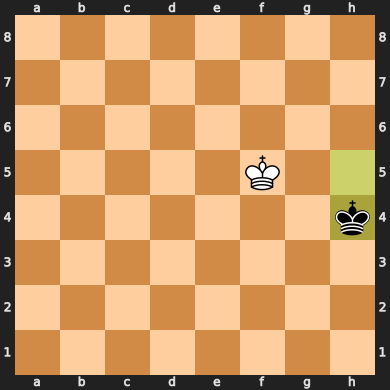

Game over
1/2-1/2


In [8]:
agent = agents.NegaMaxModelSearchAgent(good_prob_model, depth=1)
play_against_agent(agent, color = chess.BLACK)

In [25]:
board = chess.Board()
model_agent.play(board)

Move.from_uci('b1c3')

In [12]:
test_agent(model_agent, n_games=100)

100%|██████████| 50/50 [00:38<00:00,  1.29it/s]


Counter({1: 49, 0: 1})


100%|██████████| 50/50 [00:47<00:00,  1.05it/s]

Counter({-1: 46, 0: 4})


{'white': Counter({1: 49, 0: 1}), 'black': Counter({-1: 46, 0: 4})}

In [6]:
test_agent(model_agent, n_games=100)

100%|██████████| 50/50 [00:38<00:00,  1.29it/s]


Counter({1: 48, 0: 2})


100%|██████████| 50/50 [00:51<00:00,  1.02s/it]

Counter({-1: 45, 0: 4, 1: 1})


{'white': Counter({1: 48, 0: 2}), 'black': Counter({-1: 45, 0: 4, 1: 1})}

In [7]:
test_agent(model_agent, n_games=100)

100%|██████████| 50/50 [00:34<00:00,  1.43it/s]


Counter({1: 48, 0: 2})


100%|██████████| 50/50 [00:53<00:00,  1.07s/it]

Counter({-1: 48, 0: 2})


{'white': Counter({1: 48, 0: 2}), 'black': Counter({-1: 48, 0: 2})}

In [42]:
import matplotlib.pyplot as plt

def plot_two_lists(list1, list2):
    # Determine the length of the longer list
    length = max(len(list1), len(list2))

    # Generate x-axis values
    x_values = range(length)

    # Plot the lists
    plt.plot(x_values[:len(list1)], list1, label='SentiMATE')
    plt.plot(x_values[:len(list2)], list2, label='Random')

    # Add labels and legend
    plt.xlabel('Move')
    plt.ylabel('Material Count')
    plt.legend()

    # Show plot
    plt.show()

In [41]:
random_agent = RandomAgent()

res, agent_material, random_material = test_agent_material_count(model_agent, n_games=100)

100%|██████████| 50/50 [00:37<00:00,  1.34it/s]


Counter({1: 50})


100%|██████████| 50/50 [00:53<00:00,  1.07s/it]

Counter({-1: 42, 0: 8})


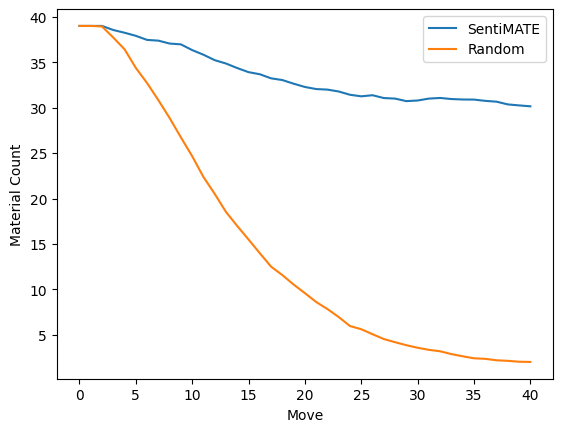

In [43]:
plot_two_lists(agent_material, random_material)

In [9]:
test_agent(agent, n_games=100)

100%|██████████| 50/50 [00:47<00:00,  1.05it/s]


Counter({1: 50})


100%|██████████| 50/50 [00:55<00:00,  1.10s/it]

Counter({-1: 44, 0: 6})


{'white': Counter({1: 50}), 'black': Counter({-1: 44, 0: 6})}

In [51]:
#epoch 3

model_agent_2 = ModelAgent(model, convert_fn=move_to_tensor)
test_agent(model_agent_2, n_games=100)

100%|██████████| 50/50 [00:24<00:00,  2.06it/s]


Counter({1: 50})


100%|██████████| 50/50 [00:22<00:00,  2.19it/s]

Counter({-1: 45, 0: 5})


{'white': Counter({1: 50}), 'black': Counter({-1: 45, 0: 5})}

In [43]:
#epoch 1

model_agent_2 = ModelAgent(model, convert_fn=move_to_tensor)
test_agent(model_agent_2, n_games=100)

100%|██████████| 50/50 [00:40<00:00,  1.24it/s]


Counter({1: 48, 0: 2})


100%|██████████| 50/50 [00:35<00:00,  1.41it/s]

Counter({-1: 48, 0: 2})


{'white': Counter({1: 48, 0: 2}), 'black': Counter({-1: 48, 0: 2})}